# Approximate a simulated non-linear function

# Task
- Use fully connected network to approximate a simulated non-linear function

## Data Exploration

In [20]:
file_name = '/src/data/function_approximation/xy_data.csv'

import pandas as pd
import numpy as np
df = pd.read_csv(file_name, header=None)
print(df.shape)

(3, 2000)


In [21]:
np_vector = df.values.transpose()
print(type(np_vector))
print(np_vector.shape)
print(np_vector[:5])

<class 'numpy.ndarray'>
(2000, 3)
[[-0.058929   0.06417    0.33     ]
 [ 0.16602   -0.0084448  0.33     ]
 [ 0.50408    0.098609   0.5      ]
 [-0.63563    0.97851    0.       ]
 [-0.63486    0.92308    0.       ]]


min:-0.999560, max:0.997750, median:-0.036787, mean:-0.033911, std:0.581712, size:2000


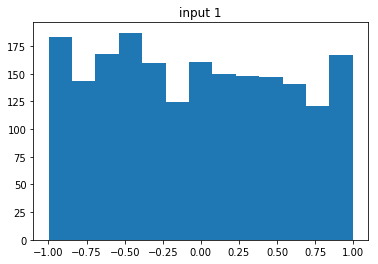

min:-0.999790, max:0.999340, median:-0.008641, mean:-0.007416, std:0.577141, size:2000


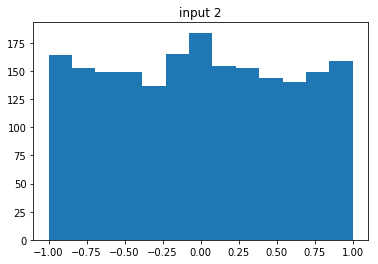

min:-0.500000, max:0.830000, median:0.000000, mean:0.034030, std:0.265202, size:2000


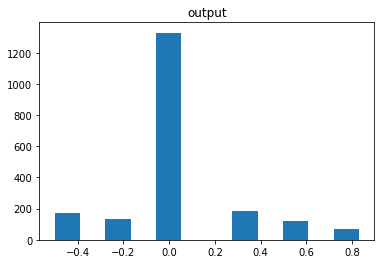

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np_vector[:, 0]
y = np_vector[:, 1]
tk = np_vector[:,2]

def explore_vector(vector, title=None):
    assert type(vector) is np.ndarray
    assert vector.ndim == 1
    print('min:%f, max:%f, median:%f, mean:%f, std:%f, size:%d' 
          % (np.min(vector), np.max(vector), np.median(vector), np.mean(vector), np.std(vector), vector.size))
    plt.title(title)
    plt.hist(vector, bins='auto')
    plt.show()

explore_vector(x, "input 1")
explore_vector(y, "input 2")
explore_vector(tk, "output")

## Data Preparation

In [23]:
# Let's shuffle it
np.random.shuffle(np_vector)
print(np_vector[:5])

[[-0.32907 -0.81644  0.     ]
 [ 0.16273  0.77587 -0.5    ]
 [ 0.28355 -0.70305  0.     ]
 [ 0.37739  0.57284  0.     ]
 [-0.8981   0.68404  0.     ]]


In [24]:
# separate input and output
input_vector = np_vector[:, :2]
print('input shape:' + str(input_vector.shape))
print(input_vector[:5])

output_vecotr = np_vector[:, 2]
print('output shape:' + str(output_vecotr.shape))
print(output_vecotr[:5])

input shape:(2000, 2)
[[-0.32907 -0.81644]
 [ 0.16273  0.77587]
 [ 0.28355 -0.70305]
 [ 0.37739  0.57284]
 [-0.8981   0.68404]]
output shape:(2000,)
[ 0.  -0.5  0.   0.   0. ]


In [25]:
pct_training = 0.9
pct_validation = 0.1

# separate training and test data
total_size = input_vector.shape[0]
training_size = int(total_size * pct_training)
test_size = total_size - training_size
val_size = int(training_size * pct_validation)

print('Total Size: %d, Train Size: %d, Validation Size: %d, Test Size: %d'
      % (total_size, training_size - val_size, val_size, test_size))

# slice data
train_in = input_vector[:training_size]
train_out = output_vecotr[:training_size]

test_in = input_vector[training_size:]
test_out = output_vecotr[training_size:]


val_in = train_in[:val_size]
val_out = train_out[:val_size]

train_in = train_in[val_size:]
train_out = train_out[val_size:]

print('train_in shape:' + str(train_in.shape))


Total Size: 2000, Train Size: 1620, Validation Size: 180, Test Size: 200
train_in shape:(1620, 2)


# Model Construction

In [26]:
from keras import models
from keras import layers

# construct model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))

model.summary()

# custom metrics
import keras.backend as K

def max_diff(y_true, y_pred):
    return K.max(K.abs(y_pred-y_true))

def min_diff(y_true, y_pred):
    return K.min(K.abs(y_pred-y_true))

# compile model with optimizer, loss function
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=[max_diff, min_diff])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
__________

In [27]:
history = model.fit(train_in,
                    train_out,
                    epochs=2000,
                    batch_size=32,
                    validation_data=(val_in, val_out))

Train on 1620 samples, validate on 180 samples
Epoch 1/2000
1620/1620 [==============================] - 1s 326us/step - loss: 0.0626 - max_diff: 0.6976 - min_diff: 0.0028 - val_loss: 0.0448 - val_max_diff: 0.6610 - val_min_diff: 0.0087
Epoch 2/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0488 - max_diff: 0.6366 - min_diff: 0.0054 - val_loss: 0.0379 - val_max_diff: 0.6287 - val_min_diff: 0.0027
Epoch 3/2000
1620/1620 [==============================] - 0s 103us/step - loss: 0.0410 - max_diff: 0.5929 - min_diff: 0.0056 - val_loss: 0.0316 - val_max_diff: 0.5525 - val_min_diff: 0.0084
Epoch 4/2000
1620/1620 [==============================] - 0s 97us/step - loss: 0.0354 - max_diff: 0.5610 - min_diff: 0.0055 - val_loss: 0.0265 - val_max_diff: 0.5278 - val_min_diff: 0.0035
Epoch 5/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0317 - max_diff: 0.5324 - min_diff: 0.0033 - val_loss: 0.0245 - val_max_diff: 0.4952 - val_min_diff: 0.0038
Epoc

Epoch 44/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0088 - max_diff: 0.2994 - min_diff: 0.0024 - val_loss: 0.0103 - val_max_diff: 0.3592 - val_min_diff: 0.0047
Epoch 45/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0083 - max_diff: 0.2887 - min_diff: 0.0021 - val_loss: 0.0118 - val_max_diff: 0.3230 - val_min_diff: 0.0015
Epoch 46/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0089 - max_diff: 0.3074 - min_diff: 0.0027 - val_loss: 0.0054 - val_max_diff: 0.2354 - val_min_diff: 0.0026
Epoch 47/2000
1620/1620 [==============================] - 0s 96us/step - loss: 0.0078 - max_diff: 0.2772 - min_diff: 0.0022 - val_loss: 0.0044 - val_max_diff: 0.2046 - val_min_diff: 0.0027
Epoch 48/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0083 - max_diff: 0.2779 - min_diff: 0.0026 - val_loss: 0.0097 - val_max_diff: 0.3153 - val_min_diff: 0.0015
Epoch 49/2000
1620/1620 [=====================

Epoch 87/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0053 - max_diff: 0.2422 - min_diff: 0.0024 - val_loss: 0.0119 - val_max_diff: 0.3058 - val_min_diff: 0.0088
Epoch 88/2000
1620/1620 [==============================] - 0s 97us/step - loss: 0.0058 - max_diff: 0.2521 - min_diff: 0.0019 - val_loss: 0.0043 - val_max_diff: 0.2341 - val_min_diff: 6.3371e-04
Epoch 89/2000
1620/1620 [==============================] - 0s 98us/step - loss: 0.0054 - max_diff: 0.2603 - min_diff: 0.0015 - val_loss: 0.0100 - val_max_diff: 0.3295 - val_min_diff: 0.0043
Epoch 90/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0058 - max_diff: 0.2652 - min_diff: 0.0016 - val_loss: 0.0036 - val_max_diff: 0.2053 - val_min_diff: 8.9194e-04
Epoch 91/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0055 - max_diff: 0.2429 - min_diff: 0.0018 - val_loss: 0.0055 - val_max_diff: 0.2674 - val_min_diff: 0.0027
Epoch 92/2000
1620/1620 [==============

1620/1620 [==============================] - 0s 104us/step - loss: 0.0043 - max_diff: 0.2261 - min_diff: 0.0020 - val_loss: 0.0041 - val_max_diff: 0.2276 - val_min_diff: 4.9370e-04
Epoch 130/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0042 - max_diff: 0.2334 - min_diff: 0.0017 - val_loss: 0.0033 - val_max_diff: 0.2147 - val_min_diff: 0.0011
Epoch 131/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0046 - max_diff: 0.2444 - min_diff: 0.0020 - val_loss: 0.0036 - val_max_diff: 0.2117 - val_min_diff: 0.0021
Epoch 132/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0043 - max_diff: 0.2347 - min_diff: 0.0018 - val_loss: 0.0050 - val_max_diff: 0.2619 - val_min_diff: 0.0023
Epoch 133/2000
1620/1620 [==============================] - 0s 98us/step - loss: 0.0042 - max_diff: 0.2358 - min_diff: 0.0014 - val_loss: 0.0053 - val_max_diff: 0.2778 - val_min_diff: 0.0013
Epoch 134/2000
1620/1620 [==========================

1620/1620 [==============================] - 0s 105us/step - loss: 0.0039 - max_diff: 0.2307 - min_diff: 0.0014 - val_loss: 0.0033 - val_max_diff: 0.1790 - val_min_diff: 3.3510e-04
Epoch 172/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0034 - max_diff: 0.2222 - min_diff: 0.0016 - val_loss: 0.0040 - val_max_diff: 0.2517 - val_min_diff: 3.1080e-04
Epoch 173/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0037 - max_diff: 0.2281 - min_diff: 0.0013 - val_loss: 0.0080 - val_max_diff: 0.3467 - val_min_diff: 0.0017
Epoch 174/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0035 - max_diff: 0.2101 - min_diff: 0.0015 - val_loss: 0.0023 - val_max_diff: 0.1742 - val_min_diff: 0.0011
Epoch 175/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0035 - max_diff: 0.2124 - min_diff: 0.0014 - val_loss: 0.0038 - val_max_diff: 0.2254 - val_min_diff: 9.9077e-04
Epoch 176/2000
1620/1620 [=================

1620/1620 [==============================] - 0s 104us/step - loss: 0.0032 - max_diff: 0.2078 - min_diff: 0.0012 - val_loss: 0.0028 - val_max_diff: 0.2164 - val_min_diff: 2.0973e-04
Epoch 214/2000
1620/1620 [==============================] - 0s 108us/step - loss: 0.0032 - max_diff: 0.2079 - min_diff: 0.0010 - val_loss: 0.0027 - val_max_diff: 0.1672 - val_min_diff: 0.0029
Epoch 215/2000
1620/1620 [==============================] - 0s 98us/step - loss: 0.0035 - max_diff: 0.2211 - min_diff: 0.0011 - val_loss: 0.0060 - val_max_diff: 0.2802 - val_min_diff: 3.2300e-04
Epoch 216/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0033 - max_diff: 0.2204 - min_diff: 0.0012 - val_loss: 0.0090 - val_max_diff: 0.3367 - val_min_diff: 0.0036
Epoch 217/2000
1620/1620 [==============================] - 0s 97us/step - loss: 0.0035 - max_diff: 0.2261 - min_diff: 7.7862e-04 - val_loss: 0.0026 - val_max_diff: 0.2088 - val_min_diff: 2.5981e-04
Epoch 218/2000
1620/1620 [===============

Epoch 255/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0034 - max_diff: 0.2203 - min_diff: 7.7428e-04 - val_loss: 0.0049 - val_max_diff: 0.2697 - val_min_diff: 0.0064
Epoch 256/2000
1620/1620 [==============================] - 0s 98us/step - loss: 0.0026 - max_diff: 0.1859 - min_diff: 9.3385e-04 - val_loss: 0.0020 - val_max_diff: 0.1602 - val_min_diff: 8.1560e-04
Epoch 257/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0029 - max_diff: 0.2062 - min_diff: 8.1128e-04 - val_loss: 0.0045 - val_max_diff: 0.2631 - val_min_diff: 3.6518e-04
Epoch 258/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0028 - max_diff: 0.1943 - min_diff: 0.0010 - val_loss: 0.0021 - val_max_diff: 0.1413 - val_min_diff: 0.0041
Epoch 259/2000
1620/1620 [==============================] - 0s 112us/step - loss: 0.0035 - max_diff: 0.2460 - min_diff: 0.0011 - val_loss: 0.0040 - val_max_diff: 0.2642 - val_min_diff: 3.7892e-04
Epoch 260/2000
16

1620/1620 [==============================] - 0s 105us/step - loss: 0.0028 - max_diff: 0.1925 - min_diff: 7.7937e-04 - val_loss: 0.0021 - val_max_diff: 0.1921 - val_min_diff: 5.4841e-04
Epoch 297/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0029 - max_diff: 0.2003 - min_diff: 7.3005e-04 - val_loss: 0.0037 - val_max_diff: 0.2667 - val_min_diff: 3.7397e-04
Epoch 298/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0026 - max_diff: 0.2042 - min_diff: 7.9597e-04 - val_loss: 0.0037 - val_max_diff: 0.1843 - val_min_diff: 0.0047
Epoch 299/2000
1620/1620 [==============================] - 0s 97us/step - loss: 0.0027 - max_diff: 0.2046 - min_diff: 7.7869e-04 - val_loss: 0.0016 - val_max_diff: 0.1633 - val_min_diff: 7.8046e-04
Epoch 300/2000
1620/1620 [==============================] - 0s 103us/step - loss: 0.0023 - max_diff: 0.1761 - min_diff: 6.9514e-04 - val_loss: 0.0030 - val_max_diff: 0.2192 - val_min_diff: 3.1786e-04
Epoch 301/2000
1620/

1620/1620 [==============================] - 0s 106us/step - loss: 0.0027 - max_diff: 0.2015 - min_diff: 0.0011 - val_loss: 0.0025 - val_max_diff: 0.2190 - val_min_diff: 1.2965e-04
Epoch 338/2000
1620/1620 [==============================] - 0s 102us/step - loss: 0.0023 - max_diff: 0.1900 - min_diff: 4.3304e-04 - val_loss: 0.0013 - val_max_diff: 0.1362 - val_min_diff: 0.0017
Epoch 339/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0026 - max_diff: 0.1843 - min_diff: 8.2198e-04 - val_loss: 0.0018 - val_max_diff: 0.1545 - val_min_diff: 2.5078e-04
Epoch 340/2000
1620/1620 [==============================] - 0s 109us/step - loss: 0.0025 - max_diff: 0.1717 - min_diff: 8.5684e-04 - val_loss: 0.0064 - val_max_diff: 0.3424 - val_min_diff: 5.3394e-04
Epoch 341/2000
1620/1620 [==============================] - 0s 102us/step - loss: 0.0024 - max_diff: 0.1881 - min_diff: 7.3799e-04 - val_loss: 0.0027 - val_max_diff: 0.2183 - val_min_diff: 8.5353e-04
Epoch 342/2000
1620/162

1620/1620 [==============================] - 0s 103us/step - loss: 0.0021 - max_diff: 0.1697 - min_diff: 6.9422e-04 - val_loss: 0.0021 - val_max_diff: 0.1355 - val_min_diff: 0.0068
Epoch 379/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0023 - max_diff: 0.1785 - min_diff: 9.8079e-04 - val_loss: 0.0088 - val_max_diff: 0.3680 - val_min_diff: 6.0777e-04
Epoch 380/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0027 - max_diff: 0.2141 - min_diff: 9.0840e-04 - val_loss: 0.0018 - val_max_diff: 0.1751 - val_min_diff: 2.3121e-04
Epoch 381/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0023 - max_diff: 0.1886 - min_diff: 6.5129e-04 - val_loss: 0.0032 - val_max_diff: 0.2221 - val_min_diff: 0.0037
Epoch 382/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0025 - max_diff: 0.1817 - min_diff: 7.1193e-04 - val_loss: 0.0014 - val_max_diff: 0.1629 - val_min_diff: 1.9846e-04
Epoch 383/2000
1620/162

1620/1620 [==============================] - 0s 103us/step - loss: 0.0022 - max_diff: 0.1785 - min_diff: 7.9234e-04 - val_loss: 0.0040 - val_max_diff: 0.2589 - val_min_diff: 1.0573e-04
Epoch 420/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0017 - max_diff: 0.1648 - min_diff: 6.7830e-04 - val_loss: 0.0021 - val_max_diff: 0.1948 - val_min_diff: 4.5661e-04
Epoch 421/2000
1620/1620 [==============================] - 0s 109us/step - loss: 0.0025 - max_diff: 0.2038 - min_diff: 9.7345e-04 - val_loss: 0.0029 - val_max_diff: 0.2243 - val_min_diff: 1.2512e-04
Epoch 422/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0023 - max_diff: 0.1786 - min_diff: 8.1304e-04 - val_loss: 0.0025 - val_max_diff: 0.1959 - val_min_diff: 3.8546e-04
Epoch 423/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0023 - max_diff: 0.1919 - min_diff: 9.5399e-04 - val_loss: 0.0042 - val_max_diff: 0.2706 - val_min_diff: 0.0019
Epoch 424/2000
1620

1620/1620 [==============================] - 0s 102us/step - loss: 0.0016 - max_diff: 0.1589 - min_diff: 8.6307e-04 - val_loss: 0.0051 - val_max_diff: 0.2828 - val_min_diff: 0.0019
Epoch 461/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0017 - max_diff: 0.1575 - min_diff: 8.3755e-04 - val_loss: 0.0011 - val_max_diff: 0.1271 - val_min_diff: 5.0929e-04
Epoch 462/2000
1620/1620 [==============================] - 0s 109us/step - loss: 0.0020 - max_diff: 0.1592 - min_diff: 6.6011e-04 - val_loss: 0.0038 - val_max_diff: 0.2610 - val_min_diff: 2.3218e-04
Epoch 463/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0019 - max_diff: 0.1612 - min_diff: 6.5798e-04 - val_loss: 0.0021 - val_max_diff: 0.2101 - val_min_diff: 2.6281e-04
Epoch 464/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0017 - max_diff: 0.1546 - min_diff: 9.0975e-04 - val_loss: 0.0019 - val_max_diff: 0.1513 - val_min_diff: 1.9410e-04
Epoch 465/2000
1620

1620/1620 [==============================] - 0s 104us/step - loss: 0.0019 - max_diff: 0.1607 - min_diff: 5.9107e-04 - val_loss: 0.0013 - val_max_diff: 0.1357 - val_min_diff: 0.0041
Epoch 502/2000
1620/1620 [==============================] - 0s 99us/step - loss: 0.0021 - max_diff: 0.1627 - min_diff: 7.2328e-04 - val_loss: 0.0023 - val_max_diff: 0.2085 - val_min_diff: 2.8363e-04
Epoch 503/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0018 - max_diff: 0.1497 - min_diff: 8.6413e-04 - val_loss: 0.0040 - val_max_diff: 0.2581 - val_min_diff: 1.8586e-04
Epoch 504/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0023 - max_diff: 0.1864 - min_diff: 5.6979e-04 - val_loss: 0.0026 - val_max_diff: 0.2285 - val_min_diff: 3.0026e-04
Epoch 505/2000
1620/1620 [==============================] - 0s 108us/step - loss: 0.0018 - max_diff: 0.1564 - min_diff: 6.6470e-04 - val_loss: 0.0033 - val_max_diff: 0.2776 - val_min_diff: 1.4186e-04
Epoch 506/2000
1620/

1620/1620 [==============================] - 0s 101us/step - loss: 0.0019 - max_diff: 0.1638 - min_diff: 6.4813e-04 - val_loss: 0.0032 - val_max_diff: 0.2415 - val_min_diff: 3.6794e-04
Epoch 543/2000
1620/1620 [==============================] - 0s 114us/step - loss: 0.0021 - max_diff: 0.1855 - min_diff: 8.4254e-04 - val_loss: 0.0024 - val_max_diff: 0.1885 - val_min_diff: 9.4617e-04
Epoch 544/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0021 - max_diff: 0.1704 - min_diff: 6.6821e-04 - val_loss: 0.0017 - val_max_diff: 0.1685 - val_min_diff: 2.7542e-04
Epoch 545/2000
1620/1620 [==============================] - 0s 95us/step - loss: 0.0020 - max_diff: 0.1644 - min_diff: 5.8493e-04 - val_loss: 0.0026 - val_max_diff: 0.2051 - val_min_diff: 0.0022
Epoch 546/2000
1620/1620 [==============================] - 0s 103us/step - loss: 0.0017 - max_diff: 0.1542 - min_diff: 7.6322e-04 - val_loss: 0.0010 - val_max_diff: 0.1424 - val_min_diff: 2.7137e-04
Epoch 547/2000
1620/

1620/1620 [==============================] - 0s 111us/step - loss: 0.0018 - max_diff: 0.1767 - min_diff: 4.4986e-04 - val_loss: 9.1891e-04 - val_max_diff: 0.1256 - val_min_diff: 1.2153e-04
Epoch 584/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0016 - max_diff: 0.1581 - min_diff: 6.1690e-04 - val_loss: 0.0011 - val_max_diff: 0.1243 - val_min_diff: 7.0234e-04
Epoch 585/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0017 - max_diff: 0.1444 - min_diff: 7.5695e-04 - val_loss: 0.0029 - val_max_diff: 0.2258 - val_min_diff: 1.6506e-04
Epoch 586/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0014 - max_diff: 0.1467 - min_diff: 7.5763e-04 - val_loss: 0.0024 - val_max_diff: 0.1634 - val_min_diff: 0.0011
Epoch 587/2000
1620/1620 [==============================] - 0s 114us/step - loss: 0.0014 - max_diff: 0.1395 - min_diff: 5.8116e-04 - val_loss: 0.0044 - val_max_diff: 0.2767 - val_min_diff: 1.4145e-04
Epoch 588/2000


1620/1620 [==============================] - 0s 100us/step - loss: 0.0015 - max_diff: 0.1506 - min_diff: 5.9889e-04 - val_loss: 0.0027 - val_max_diff: 0.2163 - val_min_diff: 7.5260e-04
Epoch 625/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0015 - max_diff: 0.1538 - min_diff: 5.5879e-04 - val_loss: 0.0014 - val_max_diff: 0.1357 - val_min_diff: 0.0012
Epoch 626/2000
1620/1620 [==============================] - 0s 102us/step - loss: 0.0015 - max_diff: 0.1422 - min_diff: 5.2625e-04 - val_loss: 0.0040 - val_max_diff: 0.1950 - val_min_diff: 0.0036
Epoch 627/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0020 - max_diff: 0.1609 - min_diff: 6.4378e-04 - val_loss: 0.0036 - val_max_diff: 0.2607 - val_min_diff: 1.8962e-04
Epoch 628/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0017 - max_diff: 0.1560 - min_diff: 4.4910e-04 - val_loss: 0.0031 - val_max_diff: 0.2219 - val_min_diff: 4.9726e-04
Epoch 629/2000
1620/162

1620/1620 [==============================] - 0s 97us/step - loss: 0.0018 - max_diff: 0.1553 - min_diff: 4.4869e-04 - val_loss: 0.0035 - val_max_diff: 0.2238 - val_min_diff: 0.0034
Epoch 666/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0016 - max_diff: 0.1533 - min_diff: 6.0116e-04 - val_loss: 0.0060 - val_max_diff: 0.3468 - val_min_diff: 4.6395e-04
Epoch 667/2000
1620/1620 [==============================] - 0s 102us/step - loss: 0.0016 - max_diff: 0.1616 - min_diff: 5.3910e-04 - val_loss: 0.0051 - val_max_diff: 0.3119 - val_min_diff: 3.6600e-04
Epoch 668/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0020 - max_diff: 0.1702 - min_diff: 6.9483e-04 - val_loss: 0.0022 - val_max_diff: 0.2003 - val_min_diff: 8.3572e-05
Epoch 669/2000
1620/1620 [==============================] - 0s 93us/step - loss: 0.0014 - max_diff: 0.1443 - min_diff: 5.5353e-04 - val_loss: 0.0082 - val_max_diff: 0.3888 - val_min_diff: 4.8182e-05
Epoch 670/2000
1620/1

1620/1620 [==============================] - 0s 100us/step - loss: 0.0016 - max_diff: 0.1446 - min_diff: 9.9591e-04 - val_loss: 0.0060 - val_max_diff: 0.3007 - val_min_diff: 7.1765e-05
Epoch 707/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0021 - max_diff: 0.1672 - min_diff: 8.4609e-04 - val_loss: 0.0030 - val_max_diff: 0.2047 - val_min_diff: 1.8836e-04
Epoch 708/2000
1620/1620 [==============================] - 0s 102us/step - loss: 0.0020 - max_diff: 0.1721 - min_diff: 4.6290e-04 - val_loss: 7.8650e-04 - val_max_diff: 0.1223 - val_min_diff: 1.5848e-04
Epoch 709/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0017 - max_diff: 0.1575 - min_diff: 7.7848e-04 - val_loss: 0.0037 - val_max_diff: 0.2449 - val_min_diff: 8.2791e-05
Epoch 710/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0018 - max_diff: 0.1630 - min_diff: 5.6750e-04 - val_loss: 0.0018 - val_max_diff: 0.1891 - val_min_diff: 1.7229e-04
Epoch 711/2

1620/1620 [==============================] - 0s 99us/step - loss: 0.0015 - max_diff: 0.1472 - min_diff: 5.6794e-04 - val_loss: 4.4575e-04 - val_max_diff: 0.0892 - val_min_diff: 1.3280e-04
Epoch 748/2000
1620/1620 [==============================] - 0s 103us/step - loss: 0.0015 - max_diff: 0.1464 - min_diff: 5.7207e-04 - val_loss: 8.6580e-04 - val_max_diff: 0.1112 - val_min_diff: 8.9845e-04
Epoch 749/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0013 - max_diff: 0.1326 - min_diff: 4.6799e-04 - val_loss: 0.0026 - val_max_diff: 0.2087 - val_min_diff: 0.0032
Epoch 750/2000
1620/1620 [==============================] - 0s 98us/step - loss: 0.0018 - max_diff: 0.1657 - min_diff: 6.5292e-04 - val_loss: 0.0041 - val_max_diff: 0.2737 - val_min_diff: 2.9277e-04
Epoch 751/2000
1620/1620 [==============================] - 0s 110us/step - loss: 0.0012 - max_diff: 0.1213 - min_diff: 4.4714e-04 - val_loss: 0.0037 - val_max_diff: 0.2829 - val_min_diff: 1.7835e-04
Epoch 752/200

1620/1620 [==============================] - 0s 98us/step - loss: 0.0012 - max_diff: 0.1304 - min_diff: 8.4041e-04 - val_loss: 0.0068 - val_max_diff: 0.3710 - val_min_diff: 3.1283e-05
Epoch 789/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0011 - max_diff: 0.1244 - min_diff: 4.9524e-04 - val_loss: 0.0025 - val_max_diff: 0.2378 - val_min_diff: 1.3785e-04
Epoch 790/2000
1620/1620 [==============================] - 0s 99us/step - loss: 0.0012 - max_diff: 0.1260 - min_diff: 7.4656e-04 - val_loss: 0.0063 - val_max_diff: 0.3527 - val_min_diff: 6.2385e-04
Epoch 791/2000
1620/1620 [==============================] - 0s 99us/step - loss: 0.0014 - max_diff: 0.1294 - min_diff: 6.1767e-04 - val_loss: 0.0040 - val_max_diff: 0.2972 - val_min_diff: 8.7400e-04
Epoch 792/2000
1620/1620 [==============================] - 0s 109us/step - loss: 0.0013 - max_diff: 0.1226 - min_diff: 4.1636e-04 - val_loss: 0.0065 - val_max_diff: 0.3446 - val_min_diff: 8.5619e-05
Epoch 793/2000
162

1620/1620 [==============================] - 0s 106us/step - loss: 0.0013 - max_diff: 0.1188 - min_diff: 4.7376e-04 - val_loss: 0.0040 - val_max_diff: 0.2747 - val_min_diff: 1.0636e-04
Epoch 830/2000
1620/1620 [==============================] - 0s 110us/step - loss: 0.0015 - max_diff: 0.1392 - min_diff: 5.3956e-04 - val_loss: 0.0020 - val_max_diff: 0.1837 - val_min_diff: 3.6251e-04
Epoch 831/2000
1620/1620 [==============================] - 0s 103us/step - loss: 0.0019 - max_diff: 0.1505 - min_diff: 4.5892e-04 - val_loss: 0.0026 - val_max_diff: 0.1973 - val_min_diff: 0.0027
Epoch 832/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0014 - max_diff: 0.1237 - min_diff: 6.0652e-04 - val_loss: 0.0044 - val_max_diff: 0.2897 - val_min_diff: 3.3715e-04
Epoch 833/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0011 - max_diff: 0.1217 - min_diff: 3.7933e-04 - val_loss: 0.0033 - val_max_diff: 0.2479 - val_min_diff: 7.9854e-05
Epoch 834/2000
1620

1620/1620 [==============================] - 0s 105us/step - loss: 0.0011 - max_diff: 0.1143 - min_diff: 4.5627e-04 - val_loss: 0.0033 - val_max_diff: 0.2254 - val_min_diff: 7.0541e-05
Epoch 871/2000
1620/1620 [==============================] - 0s 108us/step - loss: 0.0015 - max_diff: 0.1368 - min_diff: 8.4158e-04 - val_loss: 0.0035 - val_max_diff: 0.2635 - val_min_diff: 6.3390e-05
Epoch 872/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0013 - max_diff: 0.1203 - min_diff: 4.3259e-04 - val_loss: 0.0026 - val_max_diff: 0.2318 - val_min_diff: 0.0034
Epoch 873/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0011 - max_diff: 0.1131 - min_diff: 7.0527e-04 - val_loss: 0.0029 - val_max_diff: 0.2436 - val_min_diff: 6.5459e-04
Epoch 874/2000
1620/1620 [==============================] - 0s 103us/step - loss: 0.0013 - max_diff: 0.1226 - min_diff: 6.4852e-04 - val_loss: 0.0016 - val_max_diff: 0.1667 - val_min_diff: 3.3845e-04
Epoch 875/2000
1620

1620/1620 [==============================] - 0s 101us/step - loss: 0.0013 - max_diff: 0.1332 - min_diff: 8.1674e-04 - val_loss: 0.0036 - val_max_diff: 0.2776 - val_min_diff: 3.8600e-05
Epoch 912/2000
1620/1620 [==============================] - 0s 104us/step - loss: 8.9297e-04 - max_diff: 0.1044 - min_diff: 4.1830e-04 - val_loss: 8.0646e-04 - val_max_diff: 0.0965 - val_min_diff: 3.1601e-05
Epoch 913/2000
1620/1620 [==============================] - 0s 102us/step - loss: 0.0015 - max_diff: 0.1251 - min_diff: 5.0593e-04 - val_loss: 0.0053 - val_max_diff: 0.3101 - val_min_diff: 0.0081
Epoch 914/2000
1620/1620 [==============================] - 0s 109us/step - loss: 0.0019 - max_diff: 0.1726 - min_diff: 5.8392e-04 - val_loss: 0.0054 - val_max_diff: 0.3070 - val_min_diff: 9.4673e-05
Epoch 915/2000
1620/1620 [==============================] - 0s 110us/step - loss: 0.0016 - max_diff: 0.1206 - min_diff: 3.1805e-04 - val_loss: 0.0041 - val_max_diff: 0.2859 - val_min_diff: 2.9086e-04
Epoch 916/2

1620/1620 [==============================] - 0s 105us/step - loss: 0.0016 - max_diff: 0.1438 - min_diff: 4.2317e-04 - val_loss: 0.0043 - val_max_diff: 0.2807 - val_min_diff: 4.3096e-04
Epoch 953/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0013 - max_diff: 0.1322 - min_diff: 3.6200e-04 - val_loss: 0.0037 - val_max_diff: 0.2708 - val_min_diff: 4.2897e-05
Epoch 954/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0014 - max_diff: 0.1357 - min_diff: 5.5772e-04 - val_loss: 0.0019 - val_max_diff: 0.1543 - val_min_diff: 9.7606e-04
Epoch 955/2000
1620/1620 [==============================] - 0s 97us/step - loss: 0.0016 - max_diff: 0.1540 - min_diff: 4.2436e-04 - val_loss: 0.0027 - val_max_diff: 0.2181 - val_min_diff: 0.0021
Epoch 956/2000
1620/1620 [==============================] - 0s 96us/step - loss: 7.6501e-04 - max_diff: 0.0956 - min_diff: 3.0992e-04 - val_loss: 0.0037 - val_max_diff: 0.2652 - val_min_diff: 3.9690e-04
Epoch 957/2000
16

1620/1620 [==============================] - 0s 109us/step - loss: 0.0015 - max_diff: 0.1474 - min_diff: 3.7984e-04 - val_loss: 0.0024 - val_max_diff: 0.2290 - val_min_diff: 2.4800e-04
Epoch 994/2000
1620/1620 [==============================] - 0s 110us/step - loss: 0.0012 - max_diff: 0.1185 - min_diff: 4.3167e-04 - val_loss: 0.0040 - val_max_diff: 0.2837 - val_min_diff: 3.0908e-04
Epoch 995/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0015 - max_diff: 0.1466 - min_diff: 4.1472e-04 - val_loss: 0.0030 - val_max_diff: 0.2137 - val_min_diff: 5.2774e-04
Epoch 996/2000
1620/1620 [==============================] - 0s 108us/step - loss: 0.0011 - max_diff: 0.1175 - min_diff: 3.5279e-04 - val_loss: 0.0017 - val_max_diff: 0.1457 - val_min_diff: 5.1835e-05
Epoch 997/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0013 - max_diff: 0.1285 - min_diff: 4.9599e-04 - val_loss: 0.0049 - val_max_diff: 0.3009 - val_min_diff: 0.0023
Epoch 998/2000
1620

Epoch 1034/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0013 - max_diff: 0.1278 - min_diff: 3.9895e-04 - val_loss: 0.0030 - val_max_diff: 0.2390 - val_min_diff: 2.2193e-04
Epoch 1035/2000
1620/1620 [==============================] - 0s 99us/step - loss: 0.0014 - max_diff: 0.1402 - min_diff: 4.4822e-04 - val_loss: 0.0053 - val_max_diff: 0.3369 - val_min_diff: 0.0011
Epoch 1036/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0015 - max_diff: 0.1433 - min_diff: 5.3873e-04 - val_loss: 0.0022 - val_max_diff: 0.1992 - val_min_diff: 9.0900e-05
Epoch 1037/2000
1620/1620 [==============================] - 0s 98us/step - loss: 0.0015 - max_diff: 0.1375 - min_diff: 4.6177e-04 - val_loss: 0.0011 - val_max_diff: 0.1122 - val_min_diff: 2.3401e-04
Epoch 1038/2000
1620/1620 [==============================] - 0s 111us/step - loss: 0.0015 - max_diff: 0.1319 - min_diff: 5.6694e-04 - val_loss: 0.0035 - val_max_diff: 0.2680 - val_min_diff: 8.4131e-04
E

Epoch 1075/2000
1620/1620 [==============================] - 0s 102us/step - loss: 0.0019 - max_diff: 0.1534 - min_diff: 3.2517e-04 - val_loss: 0.0072 - val_max_diff: 0.3665 - val_min_diff: 7.2384e-05
Epoch 1076/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0012 - max_diff: 0.1289 - min_diff: 3.5801e-04 - val_loss: 0.0048 - val_max_diff: 0.3166 - val_min_diff: 1.1624e-04
Epoch 1077/2000
1620/1620 [==============================] - 0s 99us/step - loss: 0.0011 - max_diff: 0.1082 - min_diff: 4.3099e-04 - val_loss: 0.0037 - val_max_diff: 0.2291 - val_min_diff: 6.0787e-04
Epoch 1078/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0011 - max_diff: 0.1224 - min_diff: 3.1524e-04 - val_loss: 0.0019 - val_max_diff: 0.1824 - val_min_diff: 2.7037e-04
Epoch 1079/2000
1620/1620 [==============================] - 0s 98us/step - loss: 0.0011 - max_diff: 0.1130 - min_diff: 4.1323e-04 - val_loss: 0.0045 - val_max_diff: 0.3195 - val_min_diff: 5.1815e-

Epoch 1116/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0012 - max_diff: 0.0985 - min_diff: 3.2922e-04 - val_loss: 0.0015 - val_max_diff: 0.1481 - val_min_diff: 4.7178e-04
Epoch 1117/2000
1620/1620 [==============================] - 0s 97us/step - loss: 0.0013 - max_diff: 0.1135 - min_diff: 5.4088e-04 - val_loss: 0.0070 - val_max_diff: 0.3273 - val_min_diff: 5.1737e-05
Epoch 1118/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0014 - max_diff: 0.1460 - min_diff: 6.0094e-04 - val_loss: 0.0031 - val_max_diff: 0.2304 - val_min_diff: 1.2397e-04
Epoch 1119/2000
1620/1620 [==============================] - 0s 102us/step - loss: 0.0011 - max_diff: 0.1168 - min_diff: 3.4736e-04 - val_loss: 0.0028 - val_max_diff: 0.2205 - val_min_diff: 1.1046e-05
Epoch 1120/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0013 - max_diff: 0.1266 - min_diff: 6.0116e-04 - val_loss: 0.0025 - val_max_diff: 0.2019 - val_min_diff: 0.0029


Epoch 1157/2000
1620/1620 [==============================] - 0s 103us/step - loss: 0.0011 - max_diff: 0.1211 - min_diff: 4.4565e-04 - val_loss: 0.0031 - val_max_diff: 0.2530 - val_min_diff: 3.6445e-04
Epoch 1158/2000
1620/1620 [==============================] - 0s 103us/step - loss: 9.3310e-04 - max_diff: 0.1045 - min_diff: 3.6065e-04 - val_loss: 0.0039 - val_max_diff: 0.2999 - val_min_diff: 0.0011
Epoch 1159/2000
1620/1620 [==============================] - 0s 108us/step - loss: 0.0010 - max_diff: 0.1140 - min_diff: 4.1929e-04 - val_loss: 0.0033 - val_max_diff: 0.2398 - val_min_diff: 2.7107e-05
Epoch 1160/2000
1620/1620 [==============================] - 0s 103us/step - loss: 8.8719e-04 - max_diff: 0.0970 - min_diff: 4.6867e-04 - val_loss: 0.0032 - val_max_diff: 0.2274 - val_min_diff: 6.3861e-04
Epoch 1161/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0014 - max_diff: 0.1262 - min_diff: 4.1474e-04 - val_loss: 0.0031 - val_max_diff: 0.2349 - val_min_diff: 1.

1620/1620 [==============================] - 0s 101us/step - loss: 0.0011 - max_diff: 0.1000 - min_diff: 5.9871e-04 - val_loss: 0.0026 - val_max_diff: 0.1976 - val_min_diff: 4.2886e-04
Epoch 1198/2000
1620/1620 [==============================] - 0s 96us/step - loss: 0.0013 - max_diff: 0.1289 - min_diff: 3.5094e-04 - val_loss: 0.0037 - val_max_diff: 0.2307 - val_min_diff: 0.0015
Epoch 1199/2000
1620/1620 [==============================] - 0s 109us/step - loss: 0.0015 - max_diff: 0.1304 - min_diff: 4.4576e-04 - val_loss: 0.0033 - val_max_diff: 0.1850 - val_min_diff: 8.4513e-05
Epoch 1200/2000
1620/1620 [==============================] - 0s 109us/step - loss: 0.0010 - max_diff: 0.1129 - min_diff: 6.0458e-04 - val_loss: 0.0022 - val_max_diff: 0.1736 - val_min_diff: 4.9226e-04
Epoch 1201/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0012 - max_diff: 0.1022 - min_diff: 4.3171e-04 - val_loss: 0.0024 - val_max_diff: 0.1936 - val_min_diff: 4.6541e-04
Epoch 1202/2000


Epoch 1238/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0011 - max_diff: 0.1199 - min_diff: 3.7750e-04 - val_loss: 0.0033 - val_max_diff: 0.2245 - val_min_diff: 4.9971e-04
Epoch 1239/2000
1620/1620 [==============================] - 0s 107us/step - loss: 9.5338e-04 - max_diff: 0.1069 - min_diff: 3.5579e-04 - val_loss: 0.0032 - val_max_diff: 0.1989 - val_min_diff: 4.2664e-04
Epoch 1240/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0014 - max_diff: 0.1271 - min_diff: 5.5169e-04 - val_loss: 0.0044 - val_max_diff: 0.2791 - val_min_diff: 4.4176e-04
Epoch 1241/2000
1620/1620 [==============================] - 0s 104us/step - loss: 7.9839e-04 - max_diff: 0.0974 - min_diff: 3.6277e-04 - val_loss: 0.0051 - val_max_diff: 0.2834 - val_min_diff: 1.7721e-05
Epoch 1242/2000
1620/1620 [==============================] - 0s 109us/step - loss: 9.9611e-04 - max_diff: 0.1091 - min_diff: 3.8221e-04 - val_loss: 0.0050 - val_max_diff: 0.2951 - val_min_

Epoch 1279/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0011 - max_diff: 0.1099 - min_diff: 4.5968e-04 - val_loss: 0.0015 - val_max_diff: 0.1425 - val_min_diff: 0.0030
Epoch 1280/2000
1620/1620 [==============================] - 0s 103us/step - loss: 7.9552e-04 - max_diff: 0.0924 - min_diff: 4.4368e-04 - val_loss: 0.0025 - val_max_diff: 0.1978 - val_min_diff: 2.4660e-04
Epoch 1281/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0011 - max_diff: 0.1070 - min_diff: 3.8070e-04 - val_loss: 0.0052 - val_max_diff: 0.3117 - val_min_diff: 2.2335e-04
Epoch 1282/2000
1620/1620 [==============================] - 0s 109us/step - loss: 0.0010 - max_diff: 0.1069 - min_diff: 3.4851e-04 - val_loss: 0.0064 - val_max_diff: 0.2785 - val_min_diff: 0.0011
Epoch 1283/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0011 - max_diff: 0.1212 - min_diff: 3.5789e-04 - val_loss: 0.0037 - val_max_diff: 0.2359 - val_min_diff: 7.2577e-05

Epoch 1320/2000
1620/1620 [==============================] - 0s 103us/step - loss: 0.0013 - max_diff: 0.1285 - min_diff: 3.7044e-04 - val_loss: 0.0030 - val_max_diff: 0.2359 - val_min_diff: 3.8012e-05
Epoch 1321/2000
1620/1620 [==============================] - 0s 98us/step - loss: 0.0011 - max_diff: 0.1091 - min_diff: 3.2536e-04 - val_loss: 0.0011 - val_max_diff: 0.1409 - val_min_diff: 1.3638e-04
Epoch 1322/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0013 - max_diff: 0.1349 - min_diff: 3.3952e-04 - val_loss: 4.9081e-04 - val_max_diff: 0.0888 - val_min_diff: 9.6255e-05
Epoch 1323/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0010 - max_diff: 0.1143 - min_diff: 3.9911e-04 - val_loss: 0.0064 - val_max_diff: 0.3143 - val_min_diff: 0.0019
Epoch 1324/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0012 - max_diff: 0.1157 - min_diff: 5.1349e-04 - val_loss: 0.0016 - val_max_diff: 0.1617 - val_min_diff: 3.4940e

1620/1620 [==============================] - 0s 103us/step - loss: 0.0014 - max_diff: 0.1355 - min_diff: 3.9270e-04 - val_loss: 0.0033 - val_max_diff: 0.2363 - val_min_diff: 2.0189e-04
Epoch 1361/2000
1620/1620 [==============================] - 0s 101us/step - loss: 9.4268e-04 - max_diff: 0.0928 - min_diff: 2.9267e-04 - val_loss: 0.0048 - val_max_diff: 0.2971 - val_min_diff: 5.2672e-04
Epoch 1362/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0012 - max_diff: 0.1117 - min_diff: 7.2180e-04 - val_loss: 0.0016 - val_max_diff: 0.1675 - val_min_diff: 3.0352e-04
Epoch 1363/2000
1620/1620 [==============================] - 0s 105us/step - loss: 9.5501e-04 - max_diff: 0.1045 - min_diff: 3.4680e-04 - val_loss: 0.0034 - val_max_diff: 0.2627 - val_min_diff: 6.0538e-06
Epoch 1364/2000
1620/1620 [==============================] - 0s 105us/step - loss: 8.8817e-04 - max_diff: 0.0901 - min_diff: 3.7741e-04 - val_loss: 0.0038 - val_max_diff: 0.2668 - val_min_diff: 3.2614e-04

1620/1620 [==============================] - 0s 102us/step - loss: 7.1578e-04 - max_diff: 0.0852 - min_diff: 2.7357e-04 - val_loss: 0.0041 - val_max_diff: 0.2857 - val_min_diff: 0.0011
Epoch 1401/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0013 - max_diff: 0.1185 - min_diff: 3.3529e-04 - val_loss: 0.0023 - val_max_diff: 0.2032 - val_min_diff: 4.4766e-04
Epoch 1402/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0014 - max_diff: 0.1393 - min_diff: 3.8564e-04 - val_loss: 0.0023 - val_max_diff: 0.1478 - val_min_diff: 2.8007e-05
Epoch 1403/2000
1620/1620 [==============================] - 0s 108us/step - loss: 0.0014 - max_diff: 0.1354 - min_diff: 3.8814e-04 - val_loss: 0.0038 - val_max_diff: 0.2476 - val_min_diff: 4.6411e-04
Epoch 1404/2000
1620/1620 [==============================] - 0s 109us/step - loss: 9.5947e-04 - max_diff: 0.0986 - min_diff: 3.9398e-04 - val_loss: 0.0031 - val_max_diff: 0.2380 - val_min_diff: 1.2120e-04
Epoch 1

1620/1620 [==============================] - 0s 106us/step - loss: 0.0012 - max_diff: 0.1116 - min_diff: 3.8753e-04 - val_loss: 0.0026 - val_max_diff: 0.1972 - val_min_diff: 3.6374e-04
Epoch 1441/2000
1620/1620 [==============================] - 0s 110us/step - loss: 8.0136e-04 - max_diff: 0.0928 - min_diff: 3.0897e-04 - val_loss: 0.0055 - val_max_diff: 0.3315 - val_min_diff: 7.0581e-04
Epoch 1442/2000
1620/1620 [==============================] - 0s 95us/step - loss: 0.0012 - max_diff: 0.1199 - min_diff: 3.0468e-04 - val_loss: 0.0031 - val_max_diff: 0.1899 - val_min_diff: 4.4041e-04
Epoch 1443/2000
1620/1620 [==============================] - 0s 102us/step - loss: 8.5473e-04 - max_diff: 0.1015 - min_diff: 3.5871e-04 - val_loss: 0.0021 - val_max_diff: 0.1905 - val_min_diff: 9.0590e-04
Epoch 1444/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0011 - max_diff: 0.1119 - min_diff: 3.4392e-04 - val_loss: 0.0028 - val_max_diff: 0.1728 - val_min_diff: 1.3675e-04
Epoc

1620/1620 [==============================] - 0s 106us/step - loss: 9.4502e-04 - max_diff: 0.1093 - min_diff: 3.0262e-04 - val_loss: 0.0038 - val_max_diff: 0.2693 - val_min_diff: 1.0818e-04
Epoch 1481/2000
1620/1620 [==============================] - 0s 111us/step - loss: 0.0010 - max_diff: 0.1193 - min_diff: 2.9126e-04 - val_loss: 0.0027 - val_max_diff: 0.2237 - val_min_diff: 4.0042e-05
Epoch 1482/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0013 - max_diff: 0.1306 - min_diff: 3.6484e-04 - val_loss: 0.0021 - val_max_diff: 0.1980 - val_min_diff: 0.0011
Epoch 1483/2000
1620/1620 [==============================] - 0s 107us/step - loss: 8.8364e-04 - max_diff: 0.0986 - min_diff: 3.6115e-04 - val_loss: 0.0021 - val_max_diff: 0.1870 - val_min_diff: 7.9840e-05
Epoch 1484/2000
1620/1620 [==============================] - 0s 105us/step - loss: 7.9590e-04 - max_diff: 0.0906 - min_diff: 3.3157e-04 - val_loss: 0.0025 - val_max_diff: 0.1646 - val_min_diff: 1.3557e-04
Epo

1620/1620 [==============================] - 0s 101us/step - loss: 0.0010 - max_diff: 0.1005 - min_diff: 2.3871e-04 - val_loss: 0.0011 - val_max_diff: 0.1245 - val_min_diff: 1.1695e-04
Epoch 1521/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0015 - max_diff: 0.1232 - min_diff: 6.8362e-04 - val_loss: 0.0032 - val_max_diff: 0.2471 - val_min_diff: 0.0018
Epoch 1522/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0011 - max_diff: 0.1106 - min_diff: 4.6228e-04 - val_loss: 0.0032 - val_max_diff: 0.1848 - val_min_diff: 3.3738e-04
Epoch 1523/2000
1620/1620 [==============================] - 0s 102us/step - loss: 8.6139e-04 - max_diff: 0.1043 - min_diff: 2.7748e-04 - val_loss: 0.0024 - val_max_diff: 0.2367 - val_min_diff: 2.8559e-05
Epoch 1524/2000
1620/1620 [==============================] - 0s 101us/step - loss: 8.0685e-04 - max_diff: 0.0924 - min_diff: 3.6078e-04 - val_loss: 0.0023 - val_max_diff: 0.1858 - val_min_diff: 9.4798e-05
Epoch 1

Epoch 1561/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0011 - max_diff: 0.1071 - min_diff: 4.1630e-04 - val_loss: 0.0017 - val_max_diff: 0.1637 - val_min_diff: 0.0037
Epoch 1562/2000
1620/1620 [==============================] - 0s 104us/step - loss: 0.0011 - max_diff: 0.1108 - min_diff: 5.0946e-04 - val_loss: 0.0020 - val_max_diff: 0.1934 - val_min_diff: 4.6278e-05
Epoch 1563/2000
1620/1620 [==============================] - 0s 108us/step - loss: 0.0013 - max_diff: 0.1259 - min_diff: 4.6115e-04 - val_loss: 0.0041 - val_max_diff: 0.2950 - val_min_diff: 1.4396e-04
Epoch 1564/2000
1620/1620 [==============================] - 0s 102us/step - loss: 0.0012 - max_diff: 0.1022 - min_diff: 2.5428e-04 - val_loss: 0.0052 - val_max_diff: 0.2997 - val_min_diff: 1.1153e-04
Epoch 1565/2000
1620/1620 [==============================] - 0s 106us/step - loss: 0.0012 - max_diff: 0.1160 - min_diff: 4.1581e-04 - val_loss: 0.0044 - val_max_diff: 0.3014 - val_min_diff: 7.8601e-05

1620/1620 [==============================] - 0s 99us/step - loss: 9.7703e-04 - max_diff: 0.1069 - min_diff: 4.9224e-04 - val_loss: 0.0013 - val_max_diff: 0.1435 - val_min_diff: 0.0011
Epoch 1602/2000
1620/1620 [==============================] - 0s 105us/step - loss: 5.5099e-04 - max_diff: 0.0768 - min_diff: 3.3493e-04 - val_loss: 9.6214e-04 - val_max_diff: 0.0993 - val_min_diff: 8.3970e-06
Epoch 1603/2000
1620/1620 [==============================] - 0s 100us/step - loss: 7.6067e-04 - max_diff: 0.0873 - min_diff: 4.0489e-04 - val_loss: 0.0021 - val_max_diff: 0.1903 - val_min_diff: 7.7920e-04
Epoch 1604/2000
1620/1620 [==============================] - 0s 93us/step - loss: 0.0011 - max_diff: 0.1063 - min_diff: 4.3689e-04 - val_loss: 0.0018 - val_max_diff: 0.1475 - val_min_diff: 9.8146e-04
Epoch 1605/2000
1620/1620 [==============================] - 0s 88us/step - loss: 7.0190e-04 - max_diff: 0.0825 - min_diff: 3.3246e-04 - val_loss: 0.0018 - val_max_diff: 0.1377 - val_min_diff: 1.1719e-0

1620/1620 [==============================] - 0s 104us/step - loss: 0.0011 - max_diff: 0.1141 - min_diff: 4.0046e-04 - val_loss: 0.0018 - val_max_diff: 0.1894 - val_min_diff: 2.9484e-04
Epoch 1642/2000
1620/1620 [==============================] - 0s 100us/step - loss: 8.2399e-04 - max_diff: 0.0901 - min_diff: 4.4448e-04 - val_loss: 0.0016 - val_max_diff: 0.1394 - val_min_diff: 1.7032e-05
Epoch 1643/2000
1620/1620 [==============================] - 0s 101us/step - loss: 9.0081e-04 - max_diff: 0.1018 - min_diff: 2.8319e-04 - val_loss: 0.0013 - val_max_diff: 0.1478 - val_min_diff: 5.0019e-04
Epoch 1644/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0011 - max_diff: 0.1101 - min_diff: 3.8666e-04 - val_loss: 0.0012 - val_max_diff: 0.1257 - val_min_diff: 4.8495e-05
Epoch 1645/2000
1620/1620 [==============================] - 0s 105us/step - loss: 8.4599e-04 - max_diff: 0.0917 - min_diff: 2.6738e-04 - val_loss: 0.0019 - val_max_diff: 0.1309 - val_min_diff: 4.9651e-05

1620/1620 [==============================] - 0s 103us/step - loss: 9.5310e-04 - max_diff: 0.1117 - min_diff: 4.0196e-04 - val_loss: 0.0021 - val_max_diff: 0.1653 - val_min_diff: 1.8724e-05
Epoch 1682/2000
1620/1620 [==============================] - 0s 101us/step - loss: 0.0011 - max_diff: 0.1027 - min_diff: 3.3764e-04 - val_loss: 0.0018 - val_max_diff: 0.1785 - val_min_diff: 3.5595e-04
Epoch 1683/2000
1620/1620 [==============================] - 0s 106us/step - loss: 8.6948e-04 - max_diff: 0.1041 - min_diff: 4.0197e-04 - val_loss: 0.0044 - val_max_diff: 0.2872 - val_min_diff: 3.5965e-05
Epoch 1684/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0012 - max_diff: 0.1286 - min_diff: 3.8973e-04 - val_loss: 0.0045 - val_max_diff: 0.2343 - val_min_diff: 3.5815e-04
Epoch 1685/2000
1620/1620 [==============================] - 0s 108us/step - loss: 9.3817e-04 - max_diff: 0.1014 - min_diff: 2.9762e-04 - val_loss: 0.0027 - val_max_diff: 0.2139 - val_min_diff: 6.0675e-05

1620/1620 [==============================] - 0s 109us/step - loss: 0.0015 - max_diff: 0.1142 - min_diff: 3.1954e-04 - val_loss: 0.0025 - val_max_diff: 0.1829 - val_min_diff: 7.2598e-04
Epoch 1722/2000
1620/1620 [==============================] - 0s 96us/step - loss: 8.2744e-04 - max_diff: 0.1012 - min_diff: 2.7342e-04 - val_loss: 0.0023 - val_max_diff: 0.1827 - val_min_diff: 6.5577e-04
Epoch 1723/2000
1620/1620 [==============================] - 0s 97us/step - loss: 6.4146e-04 - max_diff: 0.0818 - min_diff: 2.3861e-04 - val_loss: 0.0031 - val_max_diff: 0.2262 - val_min_diff: 1.0081e-05
Epoch 1724/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0011 - max_diff: 0.1164 - min_diff: 4.4185e-04 - val_loss: 0.0013 - val_max_diff: 0.1450 - val_min_diff: 4.1000e-04
Epoch 1725/2000
1620/1620 [==============================] - 0s 103us/step - loss: 0.0010 - max_diff: 0.1128 - min_diff: 1.9683e-04 - val_loss: 0.0020 - val_max_diff: 0.1688 - val_min_diff: 2.8946e-05
Epoch

1620/1620 [==============================] - 0s 105us/step - loss: 8.7501e-04 - max_diff: 0.0899 - min_diff: 4.5534e-04 - val_loss: 0.0030 - val_max_diff: 0.1935 - val_min_diff: 3.7183e-04
Epoch 1762/2000
1620/1620 [==============================] - 0s 103us/step - loss: 5.3948e-04 - max_diff: 0.0778 - min_diff: 2.4361e-04 - val_loss: 0.0029 - val_max_diff: 0.2224 - val_min_diff: 3.3658e-04
Epoch 1763/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0012 - max_diff: 0.1174 - min_diff: 3.7019e-04 - val_loss: 0.0034 - val_max_diff: 0.1799 - val_min_diff: 1.6907e-04
Epoch 1764/2000
1620/1620 [==============================] - 0s 108us/step - loss: 0.0012 - max_diff: 0.1122 - min_diff: 3.4856e-04 - val_loss: 0.0035 - val_max_diff: 0.2340 - val_min_diff: 2.7463e-05
Epoch 1765/2000
1620/1620 [==============================] - 0s 109us/step - loss: 7.0087e-04 - max_diff: 0.0803 - min_diff: 2.4469e-04 - val_loss: 0.0021 - val_max_diff: 0.1254 - val_min_diff: 0.0012
Epo

1620/1620 [==============================] - 0s 106us/step - loss: 7.9795e-04 - max_diff: 0.0891 - min_diff: 4.9440e-04 - val_loss: 6.7758e-04 - val_max_diff: 0.0850 - val_min_diff: 0.0013
Epoch 1802/2000
1620/1620 [==============================] - 0s 100us/step - loss: 9.6725e-04 - max_diff: 0.0944 - min_diff: 5.3478e-04 - val_loss: 0.0018 - val_max_diff: 0.1463 - val_min_diff: 2.5951e-04
Epoch 1803/2000
1620/1620 [==============================] - 0s 104us/step - loss: 8.9576e-04 - max_diff: 0.1127 - min_diff: 3.6185e-04 - val_loss: 0.0015 - val_max_diff: 0.1682 - val_min_diff: 0.0014
Epoch 1804/2000
1620/1620 [==============================] - 0s 105us/step - loss: 8.7168e-04 - max_diff: 0.0900 - min_diff: 4.0053e-04 - val_loss: 0.0028 - val_max_diff: 0.1588 - val_min_diff: 0.0012
Epoch 1805/2000
1620/1620 [==============================] - 0s 102us/step - loss: 8.5597e-04 - max_diff: 0.0905 - min_diff: 3.9186e-04 - val_loss: 0.0020 - val_max_diff: 0.1674 - val_min_diff: 2.2434e-04

1620/1620 [==============================] - 0s 103us/step - loss: 0.0011 - max_diff: 0.1084 - min_diff: 3.9772e-04 - val_loss: 0.0041 - val_max_diff: 0.2652 - val_min_diff: 4.8018e-05
Epoch 1842/2000
1620/1620 [==============================] - 0s 105us/step - loss: 9.0548e-04 - max_diff: 0.0953 - min_diff: 3.6611e-04 - val_loss: 6.0031e-04 - val_max_diff: 0.1069 - val_min_diff: 5.5973e-05
Epoch 1843/2000
1620/1620 [==============================] - 0s 104us/step - loss: 8.4611e-04 - max_diff: 0.1056 - min_diff: 4.2129e-04 - val_loss: 0.0033 - val_max_diff: 0.2595 - val_min_diff: 0.0017
Epoch 1844/2000
1620/1620 [==============================] - 0s 101us/step - loss: 7.9186e-04 - max_diff: 0.0883 - min_diff: 2.5121e-04 - val_loss: 0.0028 - val_max_diff: 0.2295 - val_min_diff: 0.0058
Epoch 1845/2000
1620/1620 [==============================] - 0s 106us/step - loss: 7.5394e-04 - max_diff: 0.0919 - min_diff: 4.7306e-04 - val_loss: 0.0035 - val_max_diff: 0.2612 - val_min_diff: 3.1166e-04

1620/1620 [==============================] - 0s 97us/step - loss: 7.5435e-04 - max_diff: 0.0852 - min_diff: 3.8327e-04 - val_loss: 0.0028 - val_max_diff: 0.2366 - val_min_diff: 7.8140e-05
Epoch 1882/2000
1620/1620 [==============================] - 0s 103us/step - loss: 9.9177e-04 - max_diff: 0.0965 - min_diff: 3.1561e-04 - val_loss: 0.0032 - val_max_diff: 0.2121 - val_min_diff: 5.1875e-05
Epoch 1883/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0015 - max_diff: 0.1349 - min_diff: 3.2475e-04 - val_loss: 0.0041 - val_max_diff: 0.2372 - val_min_diff: 5.9998e-05
Epoch 1884/2000
1620/1620 [==============================] - 0s 107us/step - loss: 9.3618e-04 - max_diff: 0.1123 - min_diff: 3.7444e-04 - val_loss: 0.0023 - val_max_diff: 0.1718 - val_min_diff: 2.6228e-05
Epoch 1885/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0011 - max_diff: 0.1160 - min_diff: 3.9758e-04 - val_loss: 0.0026 - val_max_diff: 0.1649 - val_min_diff: 9.6753e-05


1620/1620 [==============================] - 0s 105us/step - loss: 0.0011 - max_diff: 0.1090 - min_diff: 2.9069e-04 - val_loss: 0.0037 - val_max_diff: 0.2561 - val_min_diff: 2.8731e-04
Epoch 1922/2000
1620/1620 [==============================] - 0s 100us/step - loss: 0.0010 - max_diff: 0.1067 - min_diff: 3.9928e-04 - val_loss: 0.0052 - val_max_diff: 0.3433 - val_min_diff: 1.0159e-04
Epoch 1923/2000
1620/1620 [==============================] - 0s 109us/step - loss: 0.0011 - max_diff: 0.0937 - min_diff: 3.2976e-04 - val_loss: 0.0041 - val_max_diff: 0.2745 - val_min_diff: 7.4274e-05
Epoch 1924/2000
1620/1620 [==============================] - 0s 105us/step - loss: 0.0011 - max_diff: 0.1069 - min_diff: 4.1258e-04 - val_loss: 0.0052 - val_max_diff: 0.3202 - val_min_diff: 2.6339e-04
Epoch 1925/2000
1620/1620 [==============================] - 0s 107us/step - loss: 0.0015 - max_diff: 0.1316 - min_diff: 5.0884e-04 - val_loss: 0.0043 - val_max_diff: 0.2954 - val_min_diff: 1.4741e-04
Epoch 1926/

Epoch 1962/2000
1620/1620 [==============================] - 0s 111us/step - loss: 6.8285e-04 - max_diff: 0.0930 - min_diff: 5.1207e-04 - val_loss: 0.0030 - val_max_diff: 0.1532 - val_min_diff: 4.4132e-04
Epoch 1963/2000
1620/1620 [==============================] - 0s 96us/step - loss: 0.0014 - max_diff: 0.0976 - min_diff: 4.0232e-04 - val_loss: 0.0028 - val_max_diff: 0.2012 - val_min_diff: 1.7096e-04
Epoch 1964/2000
1620/1620 [==============================] - 0s 99us/step - loss: 0.0011 - max_diff: 0.1056 - min_diff: 3.1313e-04 - val_loss: 0.0031 - val_max_diff: 0.1612 - val_min_diff: 1.3517e-05
Epoch 1965/2000
1620/1620 [==============================] - 0s 106us/step - loss: 8.9164e-04 - max_diff: 0.1022 - min_diff: 2.4239e-04 - val_loss: 0.0036 - val_max_diff: 0.2463 - val_min_diff: 1.3508e-04
Epoch 1966/2000
1620/1620 [==============================] - 0s 108us/step - loss: 9.1940e-04 - max_diff: 0.1031 - min_diff: 2.9722e-04 - val_loss: 0.0031 - val_max_diff: 0.2547 - val_min_di

In [28]:
# check out history object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_max_diff', 'val_min_diff', 'loss', 'max_diff', 'min_diff'])

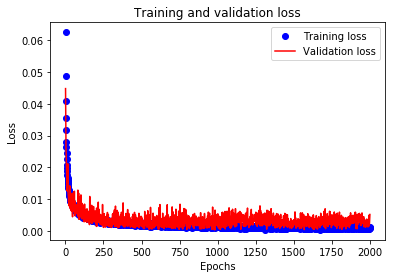

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

max_diff = history.history['max_diff']
val_max_diff = history.history['val_max_diff']

min_diff = history.history['min_diff']
val_min_diff = history.history['val_min_diff']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

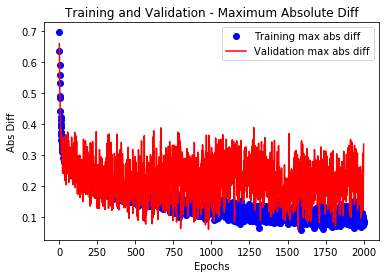

In [30]:
plt.clf()   # clear figure
plt.plot(epochs, max_diff, 'bo', label='Training max abs diff')
plt.plot(epochs, val_max_diff, 'r', label='Validation max abs diff')
plt.title('Training and Validation - Maximum Absolute Diff')
plt.xlabel('Epochs')
plt.ylabel('Abs Diff')
plt.legend()

plt.show()

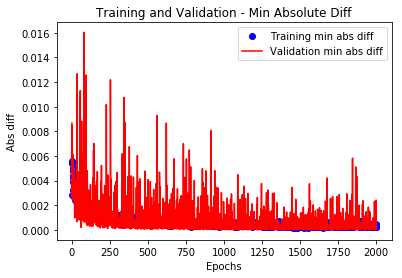

In [31]:
plt.clf()   # clear figure
plt.plot(epochs, min_diff, 'bo', label='Training min abs diff')
plt.plot(epochs, val_min_diff, 'r', label='Validation min abs diff')
plt.title('Training and Validation - Min Absolute Diff')
plt.xlabel('Epochs')
plt.ylabel('Abs diff')
plt.legend()

plt.show()

## Model Evaluation

In [32]:
# evaulate model with test data
results = model.evaluate(test_in, test_out)
results

200/200 [==============================] - 0s 33us/step


[0.005361560907222156, 0.26936460614204405, 8.097350597381592e-05]

In [33]:
pre_test_out = model.predict(test_in)
pre_test_out = pre_test_out.flatten()

min:-0.508760, max:0.853271, median:0.000110, mean:0.052143, std:0.279052, size:200


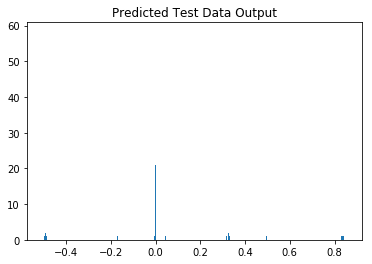

In [39]:
explore_vector(pre_test_out, 'Predicted Test Data Output')

min:-0.500000, max:0.830000, median:0.000000, mean:0.049400, std:0.283746, size:200


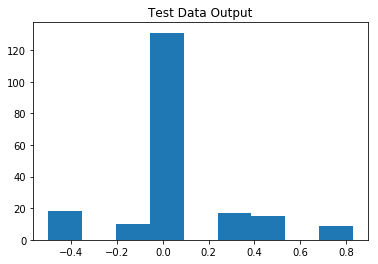

In [35]:
explore_vector(test_out, 'Test Data Output')

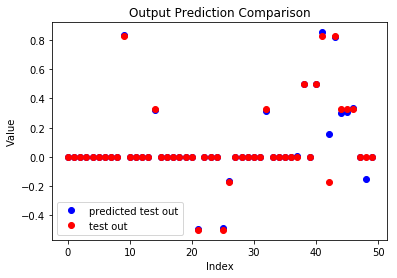

In [36]:
plt.clf()   # clear figure
NUM_PLOT = 50
plt.plot(pre_test_out[:NUM_PLOT], 'bo', label='predicted test out')
plt.plot(test_out[:NUM_PLOT], 'ro', label='test out')
plt.title('Output Prediction Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
#plt.rcParams['figure.figsize'] = [20, 20]
#plt.figure(figsize=(20, 20), dpi= 20)
plt.show()

min:0.000014, max:0.501934, median:0.001031, mean:0.018657, std:0.070806, size:200


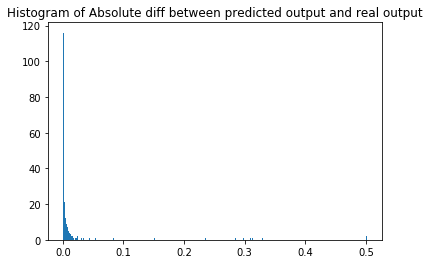

In [37]:
abs_diff_test_out = abs(pre_test_out - test_out)
plt.clf()   # clear figure
explore_vector(abs_diff_test_out, 'Histogram of Absolute diff between predicted output and real output')

Text(0, 0.5, 'Abs Diff')

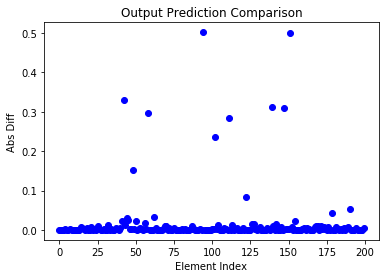

In [38]:
plt.clf()   # clear figure
plt.plot(abs_diff_test_out, 'bo', label='abs diff test out')
plt.title('Output Prediction Comparison')
plt.xlabel('Element Index')
plt.ylabel('Abs Diff')
